<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Types-of-calculations" data-toc-modified-id="Using-the-scripting-interface-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Types of calculations</a></span><ul class="toc-item"><li><span><a href="#Calculate-by-third-octave" data-toc-modified-id="Calculate-by-third-octave-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Calculate by third octave</a></span></li><li><span><a href="#Calculate-by-time-samples" data-toc-modified-id="Calculate-by-time-samples-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Calculate by time samples</a></span></li></ul></li><li><span><a href="#Functions-of-the-sound-level-meter" data-toc-modified-id="Functions-of-the-sound-level-meter-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions of the sound level meter</a></span><ul class="toc-item"><li><span><a href="#spectrum_3oct_dB" data-toc-modified-id="spectrum_3oct_dB-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>spectrum_3oct_dB</a></span></li><li><span><a href="#spectrum_3oct_dBA" data-toc-modified-id="spectrum_3oct_dBA-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>spectrum_3oct_dBA</a></span></li><li><span><a href="#spectrum_3oct_dBC" data-toc-modified-id="spectrum_3oct_dBC-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>spectrum_3oct_dBC</a></span></li><li><span><a href="#Max_level" data-toc-modified-id="Max_level-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Max_level</a></span><ul class="toc-item"><li><span><a href="#max_level_3oct" data-toc-modified-id="#max_level_3oct">max_level_3oct</a></span></li><li><span><a href="#max_level" data-toc-modified-id="#max_level">max_level</a></span></li></ul></li><li><span><a href="#Min_level" data-toc-modified-id="Min_level-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Min_level</a></span><ul class="toc-item"><li><span><a href="#min_level_3oct" data-toc-modified-id="#min_level_3oct">min_level_3oct</a></span></li><li><span><a href="#min_level" data-toc-modified-id="#min_level">min_level</a></span></li></ul></li><li><span><a href="#LN(Percentile)" data-toc-modified-id="LN(Percentile)-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>LN(Percentile)</a></span><ul class="toc-item"></ul></li></ul></li></ul></div>


# How to compute the functions of sound level meter
This tutorial explains how to use MoSQITo to compute the functions of the sound level meter. There are two types of functions: Those that work with Third Octaves and those that work with time samples. Users can calculate either by focusing on frequency bands or by focusing on representative values of a signal. 

## Types of calculations
### Calculate by third octave 
This tutorial explains how these functions operate. Each function calculates the value given by the function name from a .wav file (e.g. spectrum_3oct_dB calculates the spectrum in Thirds of an Octave, in dB, from a .wav file). These functions are recognisable because they have the suffix "_3oct" written in the name.

This kind of functions have the peculiarity of being able to split your .wav file in as many time segments as you want, the only condition is that the segments must have the same duration. For example if you have a 30 seconds .wav file you can split it into three .wav files of 10 seconds each and then decide which of these fragments to insert in the function. This allows you to "delete" one of the fragments, this, for example, you may want to do if this fragment is contaminated.

If you don't want to fragment it, you would simply enter the .wav without fragmenting it. Let's create an input array for these functions:



#### Attention!!!!!

The signals entered as input parameters for the calculation must be the parts OF THE SAME SIGNAL (they must all be from the same .wav file), three different signals are used in the tutorial just as an example. For the functions to work correctly, our .wav file must be split into segments of the same length. For example, split a 30 second file into three 10 second files. These three new .wav files correspond to the input signals entered.

In [1]:
# Third party imports
import numpy as np

# Local imports
from mosqito.utils.load import load

# Define the path of all the signals you want for the input array. In this case we test with 3 different signals.
#Pink noise
path_1 = "../tests/input/349312__newagesoup__pink-noise-10s.wav"
#White noise
path_2 = "../tests/input/349315__newagesoup__white-noise-10s.wav"
#Pure tone at 1000 HZ
path_3 = "../tests/input/554329__patobottos__beep-sound-of-1000-hz.wav"

# We get the data in Pa and the sampling frequency of all the signals with the help of the Load function.
#Pink noise
print ("First signal:")
sig_1, fs_1 = load(path_1)
print("----------------------")
#White noise
print ("Second signal:")
sig_2, fs_2 = load(path_2)
print("----------------------")
#Pure tone at 1000 Hz
print ("Third signal:")
sig_3, fs_3 = load(path_3)


ModuleNotFoundError: No module named 'mosqito.utils.load'

This is what the input array looks like:

In [2]:
# Input array with the three signals.
data_all_signals = np.stack((sig_1,sig_2,sig_3))
# Show the input array.
print(data_all_signals)

[[-2.63055563e-02  1.93548203e-03  1.18016362e-01 ... -2.76583076e-01
  -2.64079571e-01 -2.76391864e-01]
 [ 6.90580488e-01  2.10633397e-01  4.89044786e-01 ...  5.37475109e-01
   3.64259720e-01  4.63660956e-01]
 [ 3.05185095e-05  1.04338428e-01  2.07123525e-01 ... -3.06022273e-01
  -2.07225289e-01 -1.04296308e-01]]


All the functions that work with Tercios de Octave internally carry out a conversion from temporary samples in Pa to Tercios de octave in Pa. This conversion is shown here:

In [3]:
# Local imports
from mosqito.sound_level_meter.noct_spectrum.noct_spectrum import noct_spectrum

# We initialize the frequency range that we want to study, f_min is the frequency of the lower limit and
# f_max the frequency of the upper limit.
f_min = 250
f_max = 20000
# We initialize the sampling frequency (it is returned by the load function, fs_1 is the sampling frequency
# of signal 1 in section 1.1 Calculate by third octave).
fs = fs_1

# We initialize the array that stores the third octave values (in Pa) of the all signals ​​with the first signal.
spectrum_all_signals_Pa = noct_spectrum(data_all_signals[0],fs,f_min,f_max)[0]
# We initialize the number of the signals.
num_signals = data_all_signals.shape[0]

# Calculate the value of the third octave of each signal.
for i in range(num_signals):
    # We skip the first signal because we have initialized with it.
    if i != 0:
        # We calculate and save the values in Pa ​​of the third octaves of the signals.
        spectrum_all_signals_Pa = np.append(spectrum_all_signals_Pa,noct_spectrum(data_all_signals[i],fs,f_min,f_max)[0],axis=1)

### Calculate by time samples
In this tutorial for the calculations all temporary samples collected are used. Each sample is collected in a time and has its value. With this values (Pa) is calculate the signal functions of this sound level meter. Will return an array with the value have been calculated, the calculations are made for all samples so it is only a representative or generic value for the input signal.

An input array is needed, all the values in Pa of the time samples of a signal must be on the same row. Let's create an input array for these functions:  

In [4]:
# Third party imports
import numpy as np

# Local imports
from mosqito.utils.load import load

# Define the path of the signal you want for the input array. In this case we test.
#Pink noise
path = "../tests/input/349312__newagesoup__pink-noise-10s.wav"

# We get the data in Pa and the sampling frequency of all the signals with the help of the Load function.
#Pink noise 60 dB (21 is the Wab_calib value for this particular .wav).
print ("Signal:")
signal, fs = load(path)



Signal:
[Info] Multichannel signal loaded. Keeping only first channel
[Info] A calibration of 1 Pa/FS is considered


This is how the input array for these functions finally has to look like. It is just an array with the values in Pa of the level of each sample.

In [5]:
# Import useful packages
import matplotlib.pyplot as plt

print("Signal: ")
print(signal)

print("Sample rate: ")
print(fs)

Signal: 
[-0.02630556  0.00193548  0.11801636 ... -0.27658308 -0.26407957
 -0.27639186]
Sample rate: 
48000


## Functions of the sound level meter
Here explain all the functions available in the sound level meter and what array will each of them return.

### spectrum_3oct_dB
This function is only available for calculation in frequency bands (_3oct).

Calculates, in dBC, the spectrum in Thirds of octaves of a .wav file. You can enter different fragments of the same .wav file at the same time or enter a single .wav file.

In [ ]:
# Third party imports
import math

# Local imports
from mosqito.utils.conversion import amp2db

# We initialize the center frequencies of the third octaves with the first signal.
freq = noct_spectrum(data_all_signals[0],fs,f_min,f_max)[1]
# We initialize the number of frequency bands.
num_bands = freq.shape[0]
    
# Creating a list of zeros of the size of the frequency bands (to keep the spectrum_3oct_dB values).
spectrum_3oct_dB = np.zeros(num_bands)
# For each frequency band you perform the operation.
for i in range(num_bands): 
    sum = 0
    # Performs the summation with all the values of the frequency band in the different signals.
    for j in range(num_signals):
        # conversion Pa to dB
        dB = amp2db(np.array(spectrum_all_signals_Pa[i][j]), 2*(10**-5))
        # Operation: summation(10^(level(db)[i]/10))
        sum = sum + 10.0**(dB/10.0)
    # Keep the spectrum_3oct_dB value in the box corresponding to the frequency band from which the calculation is being made.
    # Operation: 10 x log(base 10)[1/number of samples x sum]
    spectrum_3oct_dB[i] = 10.0 * math.log(((1/num_signals)*sum),10)

Finally with the dB values, the averaging of levels between the .wav fragments is performed to build the spectrum. Returns the spectrum in Thirds of Octave in dB.

In [ ]:
# Import useful packages
import matplotlib.pyplot as plt

print("spectrum_3oct_dB: ")
print(spectrum_3oct_dB)

print("Freq: ")
print(freq)

#x_freq = ['25', '31.5', '40', '50', '63', '80', '100', '125', '160', '200', '250', '315',
#        '400', '500', '630', '800', '1000', '1250', '1600', '2000', '2500', '3150', '4000', '5000', '6300', '8000',
#        '10000', '12500']
x_freq = ['250', '315','400', '500', '630', '800', '1000', '1250', '1600', '2000', '2500', '3150', '4000',
            '5000', '6300', '8000','10000', '12500', '16000', '20000']
y_values = spectrum_3oct_dB

# The figure  is created
fig = plt.figure ()
# The object inside the figure is created
ax = fig.add_subplot (1, 1, 1)

# Legend on the y axis
plt.ylabel ('Level dB')
# Legend on the x axis
plt.xlabel ('Frequency Hz')
# Graphic Title
plt.title ('spectrum_3oct_dB result in Thirds of Octave')

# Bar graph is created
ax.bar (x_freq, y_values, color = "C0")
# Rotation of the x axis data
ax.set_xticklabels (x_freq, rotation = 75, fontsize = 9)
# Show the graph 
plt.show()

### spectrum_3oct_dBA

This function is only available for calculation in frequency bands (_3oct).

Calculates, in dBC, the spectrum in Thirds of octaves of a .wav file. You can enter different fragments of the same .wav file at the same time or enter a single .wav file. In order to convert dB into dBA we use an internal function of the Mosqito: spectrum2dBA_2.

In [ ]:
# Local imports
from mosqito.functions.sound_level_meter.spectrum2dBA_2 import spectrum2dBA_2

The input array is the temporary values in Pa. The operation of transforming them into Third octaves in Pa is performed (it was shown in 1.1 Calculate by third octave). Then the conversion from Pa to dB:

In [ ]:
# Local imports
from mosqito.utils.conversion import amp2db

# We initialize the size of the array in which the data is stored.
array_shape = spectrum_all_signals_Pa.shape
# We initialize the center frequencies of the third octaves with the first signal.
freq = noct_spectrum(data_all_signals[0],fs,f_min,f_max)[1]
# We initialize the number of frequency bands.
num_bands = freq.shape[0]

# Empty array to store the values in dB of the third octave of the all signals.
spectrum_all_signals_dB = np.zeros(array_shape)
# For each frequency band you perform the operation.
for i in range(num_bands):
    # Performs the conversion to dB with all the values of the frequency band in the different signals.
    for j in range(num_signals): 
        # Conversion Pa to dB.
        dB = amp2db(np.array(spectrum_all_signals_Pa[i][j]))
        # Save all values in dB of the third octave in another array.
        spectrum_all_signals_dB[i][j] = dB

Now we perform the dB to dBA conversion:

In [ ]:
# Empty array to store the values in dBA of the third octave of the all signals.
spectrum_all_signals_dBA = np.zeros(array_shape)
# For each signal you perform the operation.
for i in range(num_signals):
    # conversion dB to dBA of the all third octave values.
    dBA = spectrum2dBA_2(np.array(spectrum_all_signals_dB[:,i]), freq)
    # For each frequency band you perform the operation.
    for j in range(num_bands):
        # Save all values in dBA of the third octave in another array.
        spectrum_all_signals_dBA[j][i] = dBA[j]

Finally with the dBA values, the averaging of levels between the .wav fragments is performed to build the spectrum. Returns the spectrum in Thirds of Octave in dBA.

In [ ]:
# Third party imports
import math

# Creating a list of zeros of the size of the frequency bands (to keep the spectrum_3oct_dBA values).
spectrum_3oct_dBA = np.zeros(num_bands)
# For each frequency band you perform the operation.
for i in range(num_bands): 
    sum = 0
    # Performs the summation with all the values of the frequency band in the different signals.
    for j in range(num_signals):
        # Operation: summation(10^(level(dbA)[i]/10))
        sum = sum + 10.0**(spectrum_all_signals_dBA[i][j]/10.0)
    # Keep the spectrum_3oct_dBA value in the box corresponding to the frequency band from which the calculation is being made.
    # Operation: 10 x log(base 10)[1/number of samples x sum]
    spectrum_3oct_dBA[i] = 10.0 * math.log(((1/num_signals)*sum),10)        

Returns spectrum_3oct_dBA, which is an array with as many values as there are frequency bands being operated. 

In [ ]:
# Import useful packages
import matplotlib.pyplot as plt

print("spectrum_3oct_dBA: ")
print(spectrum_3oct_dBA)

print("Freq: ")
print(freq)

#x_freq = ['25', '31.5', '40', '50', '63', '80', '100', '125', '160', '200', '250', '315',
#        '400', '500', '630', '800', '1000', '1250', '1600', '2000', '2500', '3150', '4000', '5000', '6300', '8000',
#        '10000', '12500']
x_freq = ['250', '315','400', '500', '630', '800', '1000', '1250', '1600', '2000', '2500', '3150', '4000',
            '5000', '6300', '8000','10000', '12500', '16000', '20000']
y_values = spectrum_3oct_dBA

# The figure  is created
fig = plt.figure ()
# The object inside the figure is created
ax = fig.add_subplot (1, 1, 1)

# Legend on the y axis
plt.ylabel ('Level dBA')
# Legend on the x axis
plt.xlabel ('Frequency Hz')
# Graphic Title
plt.title ('spectrum_3oct_dBA result in Thirds of Octave')

# Bar graph is created
ax.bar (x_freq, y_values, color = "C0")
# Rotation of the x axis data
ax.set_xticklabels (x_freq, rotation = 75, fontsize = 9)
# Show the graph 
plt.show()

 ### spectrum_3oct_dBC
This function is only available for calculation in frequency bands (_3oct).

Calculates, in dBC, the spectrum in Thirds of octaves of a .wav file. You can enter different fragments of the same .wav file at the same time or enter a single .wav file. In order to convert dB into dBC we use an internal function of the Mosqito: spectrum2dBC.

In [ ]:
# Local imports
from mosqito.functions.sound_level_meter.spectrum2dBC import spectrum2dBC

The input array is the temporary values in Pa. The operation of transforming them into Third octaves in Pa is performed (it was shown in 1.1 Calculate by third octave). Then the conversion from Pa to dB:

In [ ]:
# Local imports
from mosqito.utils.conversion import amp2db

# We initialize the size of the array in which the data is stored.
array_shape = spectrum_all_signals_Pa.shape
# We initialize the center frequencies of the third octaves with the first signal.
freq = noct_spectrum(data_all_signals[0],fs,f_min,f_max)[1]
# We initialize the number of frequency bands.
num_bands = freq.shape[0]

# Empty array to store the values in dB of the third octave of the all signals.
spectrum_all_signals_dB = np.zeros(array_shape)
# For each frequency band you perform the operation.
for i in range(num_bands):
    # Performs the conversion to dB with all the values of the frequency band in the different signals.
    for j in range(num_signals): 
        # Conversion Pa to dB.
        dB = amp2db(np.array(spectrum_all_signals_Pa[i][j]))
        # Save all values in dB of the third octave in another array.
        spectrum_all_signals_dB[i][j] = dB

Now we perform the dB to dBC conversion:

In [ ]:
# Empty array to store the values in dBC of the third octave of the all signals.
spectrum_all_signals_dBC = np.zeros(array_shape)
# For each signal you perform the operation.
for i in range(num_signals):
    # conversion dB to dBC of the all third octave values.
    dBC = spectrum2dBC(np.array(spectrum_all_signals_dB[:,i]), freq)
    # For each frequency band you perform the operation.
    for j in range(num_bands):
        # Save all values in dBC of the third octave in another array.
        spectrum_all_signals_dBC[j][i] = dBC[j]

Finally with the dBC values, the averaging of levels between the .wav fragments is performed to build the spectrum. Returns the spectrum in Thirds of Octave in dBC.

In [ ]:
# Third party imports
import math

# Creating a list of zeros of the size of the frequency bands (to keep the spectrum_3oct_dBC values).
spectrum_3oct_dBC = np.zeros(num_bands)
# For each frequency band you perform the operation.
for i in range(num_bands): 
    sum = 0
    # Performs the summation with all the values of the frequency band in the different signals.
    for j in range(num_signals):
        # Operation: summation(10^(level(dbC)[i]/10))
        sum = sum + 10.0**(spectrum_all_signals_dBC[i][j]/10.0)
    # Keep the spectrum_3oct_dBC value in the box corresponding to the frequency band from which the calculation is being made.
    # Operation: 10 x log(base 10)[1/number of samples x sum]
    spectrum_3oct_dBC[i] = 10.0 * math.log(((1/num_signals)*sum),10)    

Returns spectrum_3oct_dBC, which is an array with as many values as there are frequency bands being operated. 

In [ ]:
# Import useful packages
import matplotlib.pyplot as plt

print("spectrum_3oct_dBC: ")
print(spectrum_3oct_dBC)

print("Freq: ")
print(freq)

#x_freq = ['25', '31.5', '40', '50', '63', '80', '100', '125', '160', '200', '250', '315',
#        '400', '500', '630', '800', '1000', '1250', '1600', '2000', '2500', '3150', '4000', '5000', '6300', '8000',
#        '10000', '12500']
x_freq = ['250', '315','400', '500', '630', '800', '1000', '1250', '1600', '2000', '2500', '3150', '4000',
            '5000', '6300', '8000','10000', '12500', '16000', '20000']
y_values = spectrum_3oct_dBC

# The figure  is created
fig = plt.figure ()
# The object inside the figure is created
ax = fig.add_subplot (1, 1, 1)

# Legend on the y axis
plt.ylabel ('Level dBA')
# Legend on the x axis
plt.xlabel ('Frequency Hz')
# Graphic Title
plt.title ('spectrum_3oct_dBC result in Thirds of Octave')

# Bar graph is created
ax.bar (x_freq, y_values, color = "C0")
# Rotation of the x axis data
ax.set_xticklabels (x_freq, rotation = 75, fontsize = 9)
# Show the graph 
plt.show()

### Max_level
The function returns the value of the maximum level. This function has two ways to calculate:
    
    - 1. max_level_3oct: for the maximum value of each frequency band.
    - 2. max_level: for the maximum value of the time samples.
    
#####  max_level_3oct
Return the maximum value of the frequency bands you choose. Each one is calculated with the levels (dB) of its band in the different samples. This function chooses the maximum value with the help of the function max(), then they are stored in an empty array. 

In [6]:
# Local imports
from mosqito.utils.conversion import amp2db

# We initialize the center frequencies of the third octaves with the first signal.
freq = noct_spectrum(data_all_signals[0],fs,f_min,f_max)[1]
# We initialize the number of frequency bands.
num_bands = freq.shape[0]

# Creating a list of zeros of the size of the frequency bands (to keep the maximum level values).
max_level_3oct = np.zeros(num_bands)
# Empty array to store the values in dB of the third octave whose maximum value is going to be calculated.
band_value_all_signals = np.zeros(num_signals)
# For each frequency band you perform the operation.
for i in range(num_bands):
    # Performs the conversion to dB with all the values of the frequency band in the different signals.
    for j in range(num_signals): 
        # Conversion Pa to dB.
        dB = amp2db(np.array(spectrum_all_signals_Pa[i][j]))
        # Save all values in dB of the third octave in another array.
        band_value_all_signals[j] = dB
    # Calculate and keep the maximum value found in the array. That value will be the maximum of the third of an octave.
    max_level_3oct[i] = max(band_value_all_signals)

Returns max_level_3oct, which is an array with as many values as there are frequency bands being operated.

Max_level_3oct: 
[63.8992491  64.04536684 63.77114855 63.84416146 63.98343947 69.63145363
 89.02970598 69.65634143 63.98675717 64.54542347 65.39493741 66.41737014
 67.43603232 68.39139237 69.44300504 70.39115814 71.35822928 72.37940142
 73.35470088 74.35344573]
Freq: 
[  250.   315.   400.   500.   630.   800.  1000.  1250.  1600.  2000.
  2500.  3150.  4000.  5000.  6300.  8000. 10000. 12500. 16000. 20000.]


C:\Users\hp\AppData\Local\Temp\ipykernel_3248\2071398757.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels (x_freq, rotation = 75, fontsize = 9)


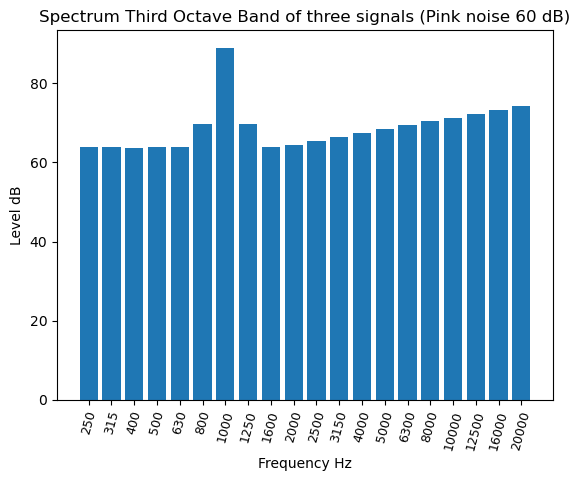

In [7]:
# Import useful packages
import matplotlib.pyplot as plt

print("Max_level_3oct: ")
print(max_level_3oct)

print("Freq: ")
print(freq)

#x_freq = ['25', '31.5', '40', '50', '63', '80', '100', '125', '160', '200', '250', '315',
#        '400', '500', '630', '800', '1000', '1250', '1600', '2000', '2500', '3150', '4000', '5000', '6300', '8000',
#        '10000', '12500']
x_freq = ['250', '315','400', '500', '630', '800', '1000', '1250', '1600', '2000', '2500', '3150', '4000',
            '5000', '6300', '8000','10000', '12500', '16000', '20000']
y_values = max_level_3oct

# The figure  is created
fig = plt.figure ()
# The object inside the figure is created
ax = fig.add_subplot (1, 1, 1)

# Legend on the y axis
plt.ylabel ('Level dB')
# Legend on the x axis
plt.xlabel ('Frequency Hz')
# Graphic Title
plt.title ('Spectrum Third Octave Band of three signals (Pink noise 60 dB)')

# Bar graph is created
ax.bar (x_freq, y_values, color = "C0")
# Rotation of the x axis data
ax.set_xticklabels (x_freq, rotation = 75, fontsize = 9)
# Show the graph 
plt.show()

#####  max_level
Return the maximum value of the series of levels (dB) collected over time (samples). Searches all samples and returns the highest level with the help of the max() function.


In [8]:
# Local imports
from mosqito.utils.conversion import amp2db

# Empty array to store the values in dB of the signal.
dB_values = np.zeros(signal.shape[0])
# Performs the conversion to dB with all the values of the signal.
for i in range(signal.shape[0]):
    #If the value is negative value.
    if signal[i] <= 0:
        # we convert it to positive.
        signal[i] = np.sqrt(np.mean(signal[i] ** 2))
    # Conversion Pa to dB.
    dB = amp2db(np.array(signal[i]))
    # Save all values in dB of the third octave in another array.
    dB_values[i] = dB
# Save the maximum level.
max_level = np.array(max(dB_values))

Returns max_level, which is one value representative of the samples.

max_level:
92.10419935517434


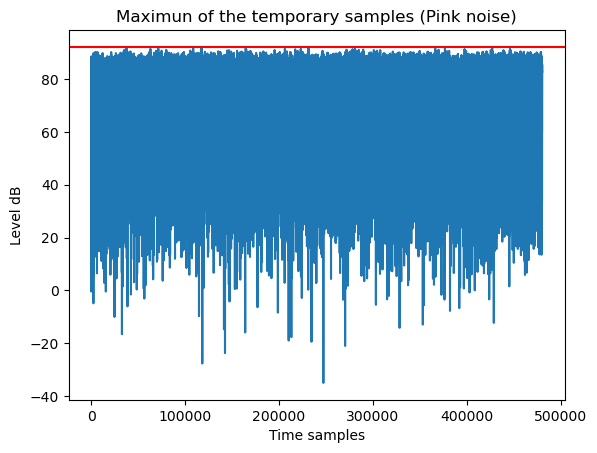

In [9]:
# Import useful packages
import matplotlib.pyplot as plt

print("max_level:")
print(max_level)

# Legend on the y axis
plt.ylabel ('Level dB')
# Legend on the x axis
plt.xlabel ('Time samples')
# Graphic Title
plt.title ('Maximun of the temporary samples (Pink noise)')

# Plot the signal with values in dB
plt.plot(dB_values)
# Plot the minimum value of the levels.
plt.axhline(y = max_level, color = 'r', linestyle = '-')
#show the graph
plt.show()

### Min_level
The function returns the value of the minimum level. This function has two ways to calculate:
    
    - 1. min_level_3oct: for the minimum value of each frequency band.
    - 2. min_level: for the minimum value of the time samples.
    
#####  min_level_3oct
Return the minimum value of the frequency bands you choose. Each one is calculated with the levels (dB) of its band in the different samples. This function chooses the minimum value with the help of the function min(), then they are stored in an empty array. 

In [ ]:
# Local imports
from mosqito.utils.conversion import amp2db

# We initialize the center frequencies of the third octaves with the first signal.
freq = noct_spectrum(data_all_signals[0],fs,f_min,f_max)[1]
# We initialize the number of frequency bands.
num_bands = freq.shape[0]

# Creating a list of zeros of the size of the frequency bands (to keep the minimum level values).
min_level_3oct = np.zeros(num_bands)
# Empty array to store the values in dB of the third octave whose minimum value is going to be calculated.
band_value_all_signals = np.zeros(num_signals)
# For each frequency band you perform the operation.
for i in range(num_bands):
    # Performs the conversion to dB with all the values of the frequency band in the different signals.
    for j in range(num_signals): 
        # Conversion Pa to dB.
        dB = amp2db(np.array(spectrum_all_signals_Pa[i][j]))
        # Save all values in dB of the third octave in another array.
        band_value_all_signals[j] = dB
    # Calculate and keep the maximum value found in the array. That value will be the maximum of the third of an octave.
    min_level_3oct[i] = min(band_value_all_signals)

Returns min_level_3oct, which is an array with as many values as there are frequency bands being operated.

In [ ]:
# Import useful packages
import matplotlib.pyplot as plt

print("Min_level_3oct: ")
print(min_level_3oct)

print("Freq: ")
print(freq)

#x_freq = ['25', '31.5', '40', '50', '63', '80', '100', '125', '160', '200', '250', '315',
#        '400', '500', '630', '800', '1000', '1250', '1600', '2000', '2500', '3150', '4000', '5000', '6300', '8000',
#        '10000', '12500']
x_freq = ['250', '315','400', '500', '630', '800', '1000', '1250', '1600', '2000', '2500', '3150', '4000',
            '5000', '6300', '8000','10000', '12500', '16000', '20000']
y_values = min_level_3oct

# The figure  is created
fig = plt.figure ()
# The object inside the figure is created
ax = fig.add_subplot (1, 1, 1)

# Legend on the y axis
plt.ylabel ('Level dB')
# Legend on the x axis
plt.xlabel ('Frequency Hz')
# Graphic Title
plt.title ('Spectrum Third Octave Band of three signals (Pink noise 60 dB)')

# Bar graph is created
ax.bar (x_freq, y_values, color = "C0")
# Rotation of the x axis data
ax.set_xticklabels (x_freq, rotation = 75, fontsize = 9)
# Show the graph 
plt.show()

#####  min_level
Return the minimum value of the series of levels (dB) collected over time (samples). Searches all samples and returns the lowest level with the help of the min() function.


In [ ]:
# Local imports
from mosqito.utils.conversion import amp2db

# Empty array to store the values in dB of the signal.
dB_values = np.zeros(signal.shape[0])
# Performs the conversion to dB with all the values of the signal.
for i in range(signal.shape[0]):
    #If the value is negative value.
    if signal[i] <= 0:
        # we convert it to positive.
        signal[i] = np.sqrt(np.mean(signal[i] ** 2))
    # Conversion Pa to dB.
    dB = amp2db(np.array(signal[i]))
    # Save all values in dB of the third octave in another array.
    dB_values[i] = dB
# Save the minimum level.
min_level = np.array(min(dB_values))

Returns min_level, which is one value representative of the samples.

In [ ]:
# Import useful packages
import matplotlib.pyplot as plt

print("min_level:")
print(min_level)

# Legend on the y axis
plt.ylabel ('Level dB')
# Legend on the x axis
plt.xlabel ('Time samples')
# Graphic Title
plt.title ('Minimun of the temporary samples (Pink noise)')

# Plot the signal with values in dB
plt.plot(dB_values)
# Plot the minimum value of the levels.
plt.axhline(y = min_level, color = 'r', linestyle = '-')
#show the graph
plt.show()

### LN(Percentile)
This function is only available for calculation with temporary samples.

Return the percentile value of the series of levels (dB) collected over time (samples). Calculate the percentile you want to study from a series of levels (dB) collected over time (samples) with the help of the numpy.percentile() function. 
    


In [ ]:
# Local imports
from mosqito.utils.conversion import amp2db

# Empty array to store the values in dB of the signal.
dB_values = np.zeros(signal.shape[0])
# Performs the conversion to dB with all the values of the signal.
for i in range(signal.shape[0]):
    #If the value is negative value.
    if signal[i] <= 0:
        # we convert it to positive.
        signal[i] = np.sqrt(np.mean(signal[i] ** 2))
    # Conversion Pa to dB.
    dB = amp2db(np.array(signal[i]))
    # Save all values in dB of the third octave in another array.
    dB_values[i] = dB
print('percentiles using interpolation = ', "linear")
# Calculate the percentiles with the values. "q" of np.percentile = 100 - N (N of LN).
L90 = np.percentile(dB_values, 10,interpolation='linear') 
L50 = np.percentile(dB_values, 50,interpolation='linear') 
L25 = np.percentile(dB_values, 75,interpolation='linear')
# Save the calculated percentile values.
percentiles = np.array([L90,L50,L25])

Returns percentiles, which is an array with all the percentiles that have been calculated.

In [ ]:
# Import useful packages
import matplotlib.pyplot as plt

print("The values of L90, L50 and L25 of the temporary signal samples")
print(percentiles)

# Legend on the y axis
plt.ylabel ('Level dB')
# Legend on the x axis
plt.xlabel ('Time samples')
# Graphic Title
plt.title ('Percentiles of the temporary samples (Pink noise)')

# Plot the signal with values in dB
plt.plot(dB_values)
# Plot the L90 value of the levels.
print("L90 is displayed in red")
plt.axhline(y = L90, color = 'r', linestyle = '-')
# Plot the L50 value of the levels.
print("L50 is displayed in green")
plt.axhline(y = L50, color = 'g', linestyle = '-')
# Plot the L90 value of the levels.
print("L25 is displayed in yelow")
plt.axhline(y = L25, color = 'y', linestyle = '-')
#show the graph
plt.show()